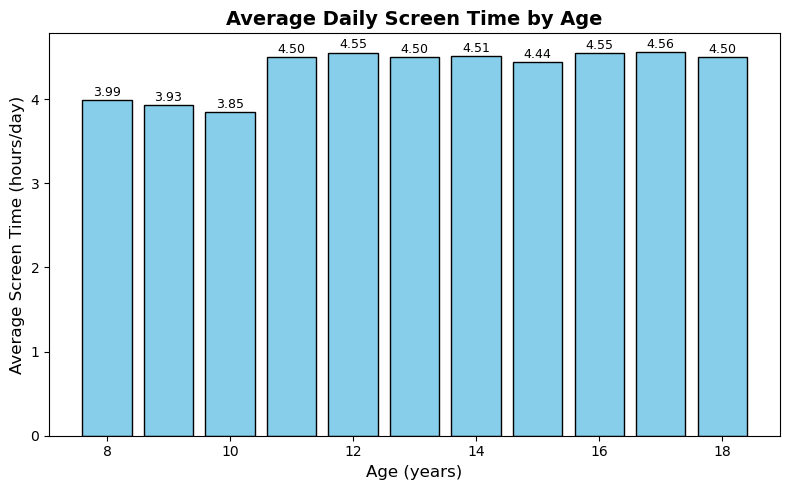

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Read your exported CSV
df = pd.read_csv("avg_screentime_by_age.csv")

# 2. Create a bar chart
plt.figure(figsize=(8,5))
plt.bar(df['age'], df['avg_screen_time'], color='skyblue', edgecolor='black')

# 3. Add titles and labels
plt.title('Average Daily Screen Time by Age', fontsize=14, weight='bold')
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Average Screen Time (hours/day)', fontsize=12)

# 4. Add value labels above each bar
for i, val in enumerate(df['avg_screen_time']):
    plt.text(df['age'][i], val + 0.05, f"{val:.2f}", ha='center', fontsize=9)

# 5. Tidy layout and save as PNG for PPT
plt.tight_layout()
plt.savefig("avg_screentime_by_age.png", dpi=300)  # high resolution for PPT
plt.show()

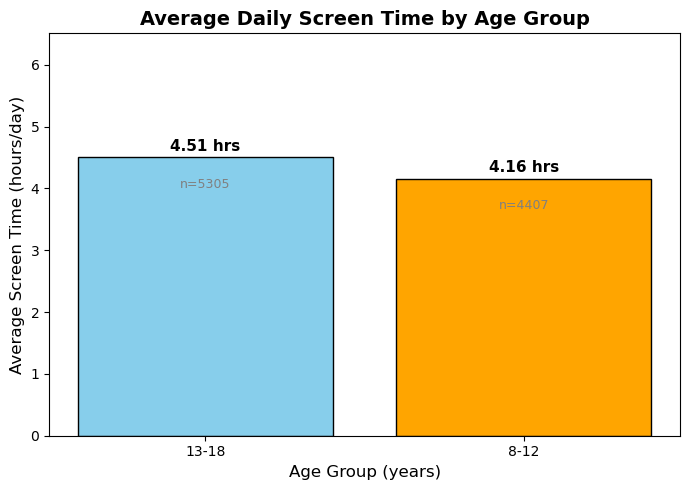

In [3]:
# Load your CSV (update the filename as needed)
df = pd.read_csv("avg_screentime_by_agegroup.csv")

# Plot bar chart of average screen time by age group
plt.figure(figsize=(7,5))
bars = plt.bar(df['age_group'], df['avg_hr'], color=['skyblue', 'orange'], edgecolor='black')

# Add data labels on top of each bar: avg_hr and count of children
for bar, avg_hr, count in zip(bars, df['avg_hr'], df['number_of_child']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, f"{avg_hr} hrs", ha='center', fontsize=11, fontweight='bold')
    plt.text(bar.get_x() + bar.get_width()/2, height - 0.5, f"n={count}", ha='center', fontsize=9, color='gray')

# Titles and labels
plt.title("Average Daily Screen Time by Age Group", fontsize=14, fontweight='bold')
plt.xlabel("Age Group (years)", fontsize=12)
plt.ylabel("Average Screen Time (hours/day)", fontsize=12)
plt.ylim(0, max(df['avg_hr']) + 2)

plt.tight_layout()
plt.savefig("avg_screen_time_by_age_group.png", dpi=300)
plt.show()

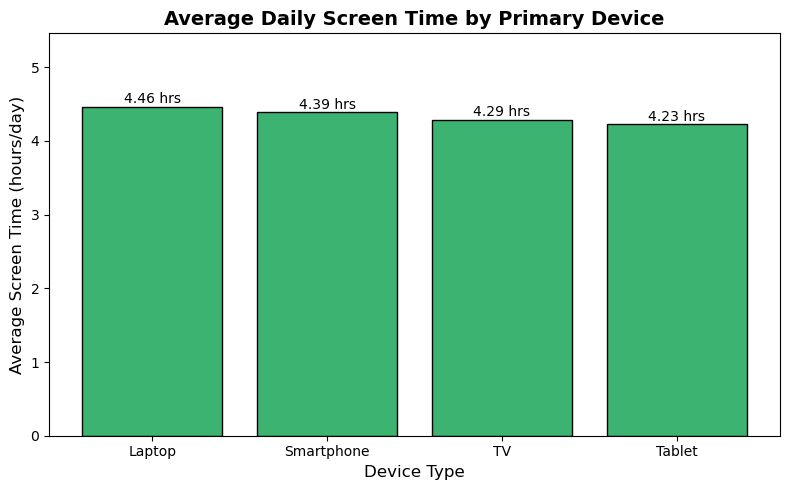

In [4]:
# Load your CSV (update filename as needed)
df = pd.read_csv("avg_screentime_by_device.csv")

# Sort by avg_screen_time descending for better visualization
df = df.sort_values('avg_screen_time', ascending=False)

plt.figure(figsize=(8,5))
bars = plt.bar(df['primary_device'], df['avg_screen_time'], color='mediumseagreen', edgecolor='black')

# Add value labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.05, f"{height:.2f} hrs", ha='center', fontsize=10)

plt.title("Average Daily Screen Time by Primary Device", fontsize=14, fontweight='bold')
plt.xlabel("Device Type", fontsize=12)
plt.ylabel("Average Screen Time (hours/day)", fontsize=12)
plt.ylim(0, max(df['avg_screen_time']) + 1)

plt.tight_layout()
plt.savefig("avg_screen_time_by_device.png", dpi=300)
plt.show()

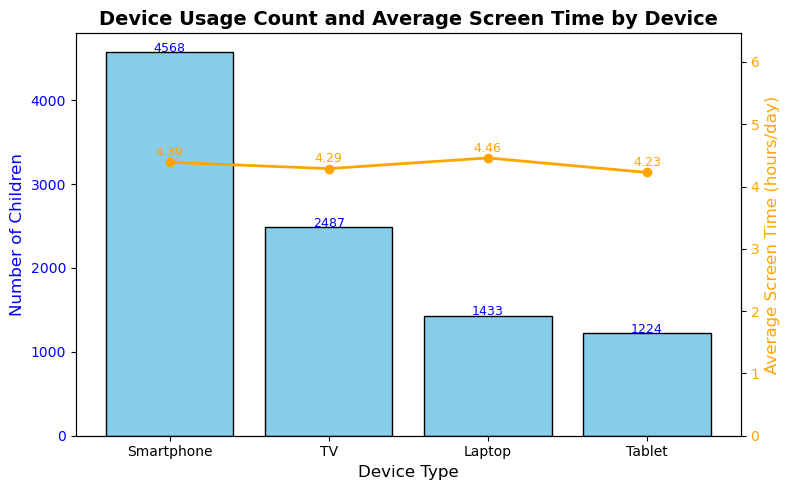

In [5]:
# Load data
df = pd.read_csv("avg_screentime_by_device&screen.csv")

fig, ax1 = plt.subplots(figsize=(8,5))

# Bar plot for device count
bars = ax1.bar(df['primary_device'], df['device_count'], color='skyblue', edgecolor='black')
ax1.set_xlabel('Device Type', fontsize=12)
ax1.set_ylabel('Number of Children', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

# Add labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 5, f"{int(height)}", ha='center', fontsize=9, color='blue')

# Second y-axis for average screen time
ax2 = ax1.twinx()
ax2.plot(df['primary_device'], df['avg_screen_time'], color='orange', marker='o', linewidth=2, label='Avg Screen Time (hrs)')
ax2.set_ylabel('Average Screen Time (hours/day)', color='orange', fontsize=12)
ax2.tick_params(axis='y', labelcolor='orange')
ax2.set_ylim(0, max(df['avg_screen_time']) + 2)

# Add data labels for avg screen time
for i, val in enumerate(df['avg_screen_time']):
    ax2.text(i, val + 0.1, f"{val:.2f}", ha='center', fontsize=9, color='orange')

plt.title('Device Usage Count and Average Screen Time by Device', fontsize=14, fontweight='bold')
fig.tight_layout()
plt.savefig("device_count_avg_screen_time_combined.png", dpi=300)
plt.show()

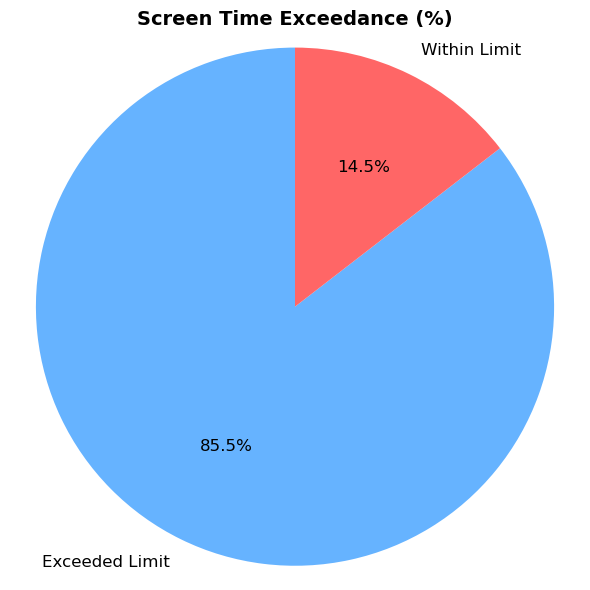

In [15]:
# Load your CSV (update filename accordingly)
df = pd.read_csv("children_exceeding_limit.csv")

# Map 0 and 1 to meaningful labels
labels = ['Exceeded Limit', 'Within Limit']
sizes = df['percentage']

colors = ['#66b3ff', '#ff6666']  # blue for within limit, red for exceeded

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
plt.title('Screen Time Exceedance (%)', fontsize=14, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio to make pie circular

plt.tight_layout()
plt.savefig("exceeded_screen_time_pie_chart.png", dpi=300)
plt.show()

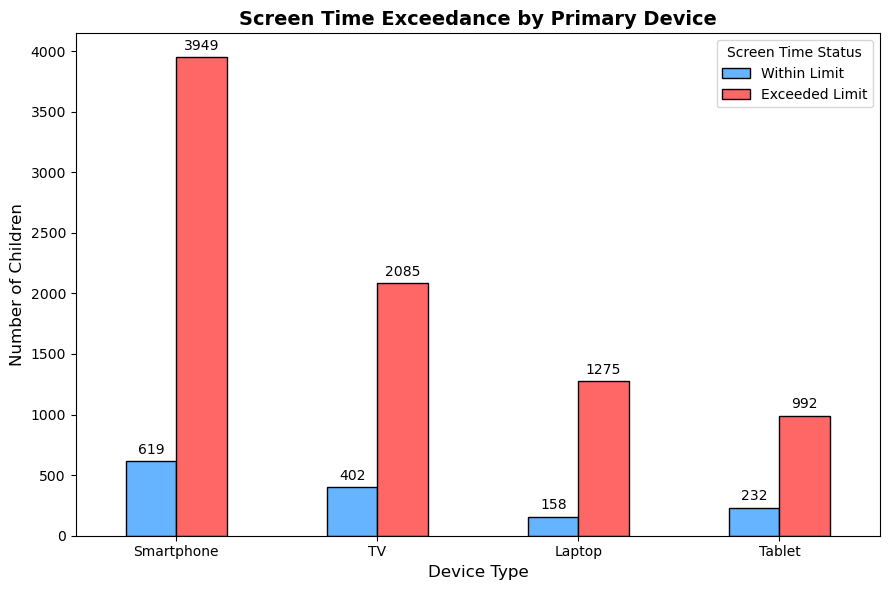

In [13]:

# Load your CSV (update filename)
df = pd.read_csv("children_exceeding_limit&device.csv")


# Pivot the data for easier plotting
pivot_df = df.pivot(index='primary_device', columns='exceeded_recommended_limit', values='count').fillna(0)
pivot_df.columns = ['Within Limit', 'Exceeded Limit']

# Sort devices if you want (optional)
pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=False).index]

# Plot grouped bar chart
ax = pivot_df.plot(kind='bar', figsize=(9,6), color=['#66b3ff', '#ff6666'], edgecolor='black')

plt.title('Screen Time Exceedance by Primary Device', fontsize=14, fontweight='bold')
plt.xlabel('Device Type', fontsize=12)
plt.ylabel('Number of Children', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Screen Time Status')

# Add counts above bars
for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.tight_layout()
plt.savefig("screen_time_exceedance_by_device.png", dpi=300)
plt.show()

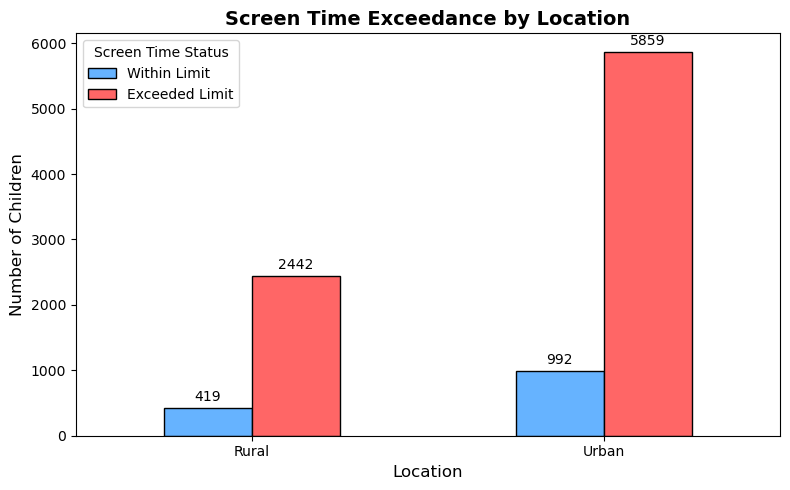

In [11]:
 #Load the CSV exported from your SQL query
df = pd.read_csv("children_exceedinglimit&urban.csv")

# Pivot for grouped bar chart
pivot_df = df.pivot(index='urban_or_rural', columns='exceeded_recommended_limit', values='count').fillna(0)
pivot_df.columns = ['Within Limit', 'Exceeded Limit']  # 0 = within, 1 = exceeded

# Plot
ax = pivot_df.plot(kind='bar', figsize=(8,5), color=['#66b3ff', '#ff6666'], edgecolor='black')

plt.title('Screen Time Exceedance by Location', fontsize=14, fontweight='bold')
plt.xlabel('Location', fontsize=12)
plt.ylabel('Number of Children', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Screen Time Status')

# Add value labels
for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.tight_layout()
plt.savefig("screen_time_exceedance_by_location.png", dpi=300)
plt.show()

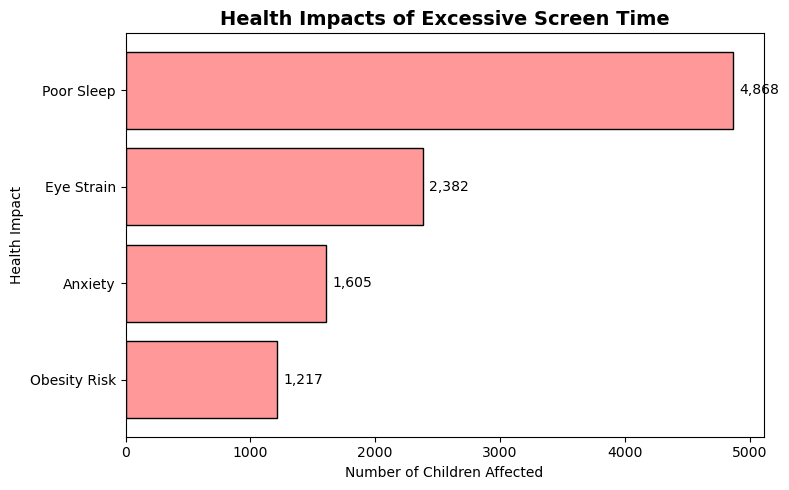

In [16]:
# Load the CSV exported from your SQL query
df = pd.read_csv("screentime&healthimpacts.csv")

# Sort for visual clarity (largest first)
df = df.sort_values(by="num_child_affected", ascending=True)

# Create horizontal bar chart
plt.figure(figsize=(8,5))
bars = plt.barh(df['impact_name'], df['num_child_affected'], color="#ff9999", edgecolor='black')

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 50, bar.get_y() + bar.get_height()/2,
             f"{width:,}", va='center', fontsize=10)

plt.title("Health Impacts of Excessive Screen Time", fontsize=14, fontweight='bold')
plt.xlabel("Number of Children Affected")
plt.ylabel("Health Impact")
plt.tight_layout()
plt.savefig("health_impacts_chart.png", dpi=300)
plt.show()

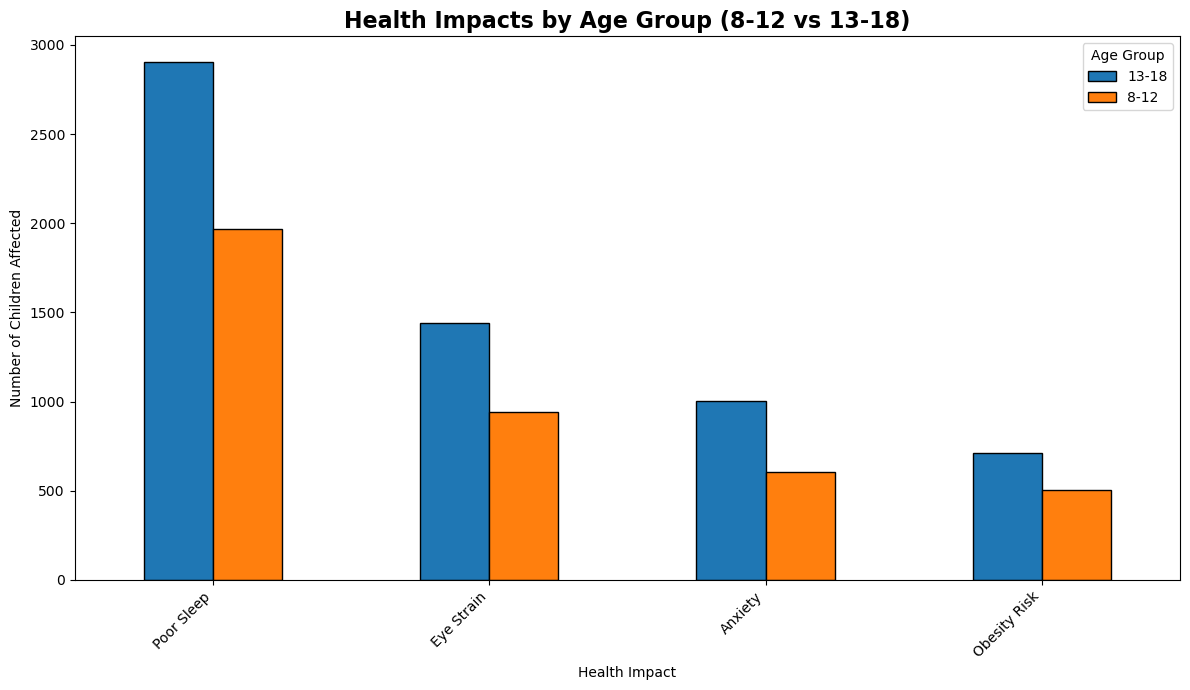

In [21]:

# Load CSV exported from your SQL query
df = pd.read_csv("screentime&healthimpacts_by_agegroup.csv")

# Pivot data: impacts on X-axis, age groups as columns, values = counts
pivot_df = df.pivot(index='impact_name', columns='age_group', values='num_child_affected').fillna(0)

# Sort impacts by total number affected (descending)
pivot_df['total'] = pivot_df.sum(axis=1)
pivot_df = pivot_df.sort_values('total', ascending=False).drop('total', axis=1)

# Plot grouped bar chart
ax = pivot_df.plot(kind='bar', figsize=(12,7), edgecolor='black', color=['#1f77b4', '#ff7f0e'])

plt.title("Health Impacts by Age Group (8-12 vs 13-18)", fontsize=16, fontweight='bold')
plt.xlabel("Health Impact")
plt.ylabel("Number of Children Affected")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()